#                                 <font color=Black>TRIP ADVISER REVIEW ANALYSIS </font>

## Data Source

 As part of this analysis, we analyze the Hotel reviews from **Tripadviser**. we could find the [Trip Adviser dataset here](https://github.com/kavgan/OpinRank). This analysis is focused to **Dimensionality Reduction** technique. At the end of this blog, we will see the **recommended hotels based on their earlier stay**

In [4]:
# Required Packages

from collections import Counter, defaultdict
from scipy.sparse import lil_matrix, spmatrix, csr_matrix, save_npz, load_npz
import matplotlib.pyplot as plt
import numpy as np
import string
import os
import re
import pandas as pd
import sys
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from nltk.corpus import stopwords

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

import matplotlib.pyplot as plt
import networkx as nx
%matplotlib notebook    

In [5]:
#Selecting cities and data path
DataPath="E:\\Techi\\Courses\\Masters in Data Science\\Courses\\Text Visualization\\Data sets\\Trip Advisor\\hotels\\data\\"
Output="E:\\Techi\\Courses\Masters in Data Science\\Courses\\Text Visualization\\Data sets\Trip Advisor\\hotels\\output\\"
Cities=['beijing', 'chicago', 'dubai', 'las-vegas', 'london', 'montreal', 'new-delhi', 'new-york-city', 'san-francisco', 'shanghai']
Stopwords=["nan","quot","amp","a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

## Data Retrivel and Processing

Below code collect reviews from all files and append it.

In [6]:
Dataset=pd.read_csv(DataPath+"test", names=['Date','Title','Content'], delimiter="\t", index_col=3, encoding = "ISO-8859-1")
Dataset["City"]="Test"
Dataset.reset_index()
for city in Cities :
    print("Started : "+city)
    for i in os.listdir(DataPath+city+"\\"):
        try :
            Dataset2=pd.read_csv(DataPath+city+"\\"+i, names=['Date','Title','Content'], delimiter="\t", index_col=3, encoding = "ISO-8859-1")
            Dataset2.reset_index()
            Dataset2["City"]=city
            Dataset2["Hotel"]=i
            Dataset=pd.concat([Dataset,Dataset2],ignore_index=True,axis=0, sort=True)
        except :
            print(city+"\\"+i+" file is corrupted")
    print("Completed : "+city)


Started : beijing
Completed : beijing
Started : chicago
chicago\usa_illinois_chicago_the_whitehall_hotel file is corrupted
Completed : chicago
Started : dubai
dubai\are_dubai_towers_rotana_dubai file is corrupted
Completed : dubai
Started : las-vegas
Completed : las-vegas
Started : london
london\uk_england_london_best_western_phoenix_hotel file is corrupted
london\uk_england_london_hilton_london_green_park file is corrupted
london\uk_england_london_merlyn_court_hotel file is corrupted
london\uk_england_london_st_david_s_hotels file is corrupted
Completed : london
Started : montreal
Completed : montreal
Started : new-delhi
Completed : new-delhi
Started : new-york-city
new-york-city\usa_new york city_park_central file is corrupted
Completed : new-york-city
Started : san-francisco
Completed : san-francisco
Started : shanghai
Completed : shanghai


In [1]:
# Taken from Gensim preparators
RE_PUNCT = re.compile(r'([%s])+' % re.escape(string.punctuation), re.UNICODE)
RE_NUMERIC = re.compile(r"[0-9]+", re.UNICODE)
RE_NONALPHA = re.compile(r"\W", re.UNICODE)
RE_WHITESPACE = re.compile(r"(\s)+", re.UNICODE)
MIN_LENGTH = 3

# Function definition

def preprocess(s):
    if s is None or s is np.nan:
        return ""
    s = s.lower()
    s = RE_PUNCT.sub(" ", s)
    s = RE_WHITESPACE.sub(" ", s)
    s = RE_NUMERIC.sub("", s)
    s = ' '.join([w for w in s.split() if len(w)>=MIN_LENGTH])
    s = RE_NONALPHA.sub(" ", s)
    return s

NameError: name 're' is not defined

## Extracting date features

In [399]:
Dataset["Date"]=pd.to_datetime(Dataset["Date"])
Dataset.index=Dataset.Date
Dataset["Year"]=Dataset.index.year
Dataset["Month"]=Dataset.index.month

In [400]:
#HotelLevel

Hotel=[]
Feedback=[]

for i, x in Dataset.groupby("Hotel")['Content']:
    ns=""
    for s in x:
        ns=ns+" "+str(s)
    Feedback.append(ns)
    Hotel.append(i)
    
HotelLevelDS=pd.DataFrame({"Hotel":Hotel,"Feedback":Hotel})
HotelLevelDS['Feedback'] = HotelLevelDS['Feedback'].apply(lambda x:preprocess(x))

In [401]:
docs=HotelLevelDS['Feedback'].tolist()

cv=TfidfVectorizer(max_df=0.85,stop_words=Stopwords)
tf_idf_vector=cv.fit_transform(docs)

feature_names = cv.get_feature_names()

doc = 5
for q in range(len(HotelLevelDS)):
    doc = q
    feature_index = tf_idf_vector[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tf_idf_vector[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        print(docs[doc]+"\t"+w+"\t"+str(s))
        
 ##Saved this as TFIDF.xlsx       

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


are dubai abc almanar hotel apartment	dubai	0.24984793295389443
are dubai abc almanar hotel apartment	abc	0.5721107982199282
are dubai abc almanar hotel apartment	almanar	0.6020443094705542
are dubai abc almanar hotel apartment	hotel	0.11957932247281515
are dubai abc almanar hotel apartment	apartment	0.4832273585279386
are dubai admiral plaza hotel	dubai	0.34570940439612846
are dubai admiral plaza hotel	hotel	0.16545942910721662
are dubai admiral plaza hotel	admiral	0.7916178491566829
are dubai admiral plaza hotel	plaza	0.4758669624255666
are dubai bustan centre residence	dubai	0.2973252323455922
are dubai bustan centre residence	bustan	0.6808260288451226
are dubai bustan centre residence	centre	0.4815137280912391
are dubai bustan centre residence	residence	0.46499263899259297
are dubai bustan rotana dubai	dubai	0.5524644737300325
are dubai bustan rotana dubai	bustan	0.6325265278703895
are dubai bustan rotana dubai	rotana	0.5428565158551821
are dubai hijaz heritage motel	dubai	0.266902

are dubai sun sands hotel	sands	0.6662481701066439
are dubai sun sands hotel	sun	0.6662481701066439
are dubai symphony hotel apartments	dubai	0.3348629022955266
are dubai symphony hotel apartments	hotel	0.1602682019593447
are dubai symphony hotel apartments	apartments	0.45944888780497245
are dubai symphony hotel apartments	symphony	0.8069000307359699
are dubai taj palace hotel	dubai	0.3492428012991979
are dubai taj palace hotel	hotel	0.16715054258852988
are dubai taj palace hotel	palace	0.5404530276867503
are dubai taj palace hotel	taj	0.7469944355330056
are dubai tamani hotel marina	dubai	0.3061672275240504
are dubai tamani hotel marina	hotel	0.146534210621075
are dubai tamani hotel marina	marina	0.5835313457176734
are dubai tamani hotel marina	tamani	0.7377537004128247
are dubai the address downtown burj dubai	dubai	0.48413810693608916
are dubai the address downtown burj dubai	burj	0.5542984397213393
are dubai the address downtown burj dubai	downtown	0.34369267937402304
are dubai the

can montreal red carpet inn parc olympique	parc	0.45667261836120515
can montreal red carpet inn parc olympique	red	0.44669636159322074
can montreal red carpet inn parc olympique	carpet	0.5015314166423381
can montreal red carpet inn parc olympique	olympique	0.5015314166423381
can montreal residence inn marriott montreal downtown	residence	0.4664121103178787
can montreal residence inn marriott montreal downtown	inn	0.28068526957393164
can montreal residence inn marriott montreal downtown	marriott	0.42499449082308693
can montreal residence inn marriott montreal downtown	downtown	0.42343477020837983
can montreal residence inn marriott montreal downtown	montreal	0.5863089637227407
can montreal residence inn montreal westmount	residence	0.44341019783839347
can montreal residence inn montreal westmount	inn	0.26684279451336756
can montreal residence inn montreal westmount	montreal	0.5573941324583964
can montreal residence inn montreal westmount	westmount	0.649225770106336
can montreal ritz car

can quebec montreal les studios hotel	hotel	0.1751440189781121
can quebec montreal les studios hotel	montreal	0.3597129013748113
can quebec montreal les studios hotel	studios	0.8068455738689237
can quebec montreal les studios hotel	quebec	0.43466242203443045
can quebec montreal loews hotel vogue	hotel	0.1342439042267794
can quebec montreal loews hotel vogue	montreal	0.2757117517517504
can quebec montreal loews hotel vogue	loews	0.6184287683714552
can quebec montreal loews hotel vogue	vogue	0.6422714698086904
can quebec montreal loews hotel vogue	quebec	0.3331588534682545
can quebec montreal lord berri	montreal	0.2841416993247583
can quebec montreal lord berri	lord	0.6027055020341069
can quebec montreal lord berri	berri	0.6619090615461692
can quebec montreal lord berri	quebec	0.3433452588368207
can quebec montreal manoir ambrose	montreal	0.2863984746787702
can quebec montreal manoir ambrose	manoir	0.5942214515292654
can quebec montreal manoir ambrose	ambrose	0.6671662274610787
can quebe

china beijing marriott beijing hotel west	china	0.28825069625781213
china beijing marriott beijing hotel west	beijing	0.6912690398109553
china beijing marriott executive apartments sandalwood	apartments	0.3469776381968643
china beijing marriott executive apartments sandalwood	marriott	0.3603786980964431
china beijing marriott executive apartments sandalwood	executive	0.4819886457207293
china beijing marriott executive apartments sandalwood	china	0.24479554044332857
china beijing marriott executive apartments sandalwood	beijing	0.293528481264991
china beijing marriott executive apartments sandalwood	sandalwood	0.6093741313932373
china beijing marriott hotel beijing city wall	hotel	0.1288460080574711
china beijing marriott hotel beijing city wall	city	0.25038810984017495
china beijing marriott hotel beijing city wall	marriott	0.3836351863572423
china beijing marriott hotel beijing city wall	china	0.26059304635221753
china beijing marriott hotel beijing city wall	beijing	0.624941785993785

china shanghai howard johnson huaihai hotel	howard	0.4764095902525361
china shanghai howard johnson huaihai hotel	johnson	0.4999302643008459
china shanghai howard johnson huaihai hotel	shanghai	0.29572892378945775
china shanghai howard johnson huaihai hotel	huaihai	0.6023205791776218
china shanghai howard johnson plaza hotel shanghai	hotel	0.11857400628586143
china shanghai howard johnson plaza hotel shanghai	plaza	0.34102288699013705
china shanghai howard johnson plaza hotel shanghai	china	0.2398177637171113
china shanghai howard johnson plaza hotel shanghai	howard	0.472187683421234
china shanghai howard johnson plaza hotel shanghai	johnson	0.49549991898200474
china shanghai howard johnson plaza hotel shanghai	shanghai	0.5862163915330854
china shanghai hua ting hotel towers	hotel	0.11639799409262583
china shanghai hua ting hotel towers	towers	0.4412342658121613
china shanghai hua ting hotel towers	china	0.2354167453628453
china shanghai hua ting hotel towers	shanghai	0.287729217456679

india new delhi hotel chand palace	hotel	0.14316553424103576
india new delhi hotel chand palace	palace	0.46290155713959635
india new delhi hotel chand palace	india	0.3498169462108503
india new delhi hotel chand palace	delhi	0.3511561631650416
india new delhi hotel chand palace	chand	0.720793473484699
india new delhi hotel city park	hotel	0.2060169862968046
india new delhi hotel city park	park	0.5371440108118248
india new delhi hotel city park	city	0.4003554675191587
india new delhi hotel city park	india	0.5033909410946321
india new delhi hotel city park	delhi	0.505318090966022
india new delhi hotel clark heights	hotel	0.1338115698642892
india new delhi hotel clark heights	heights	0.5980028335571745
india new delhi hotel clark heights	india	0.32696105934823794
india new delhi hotel clark heights	delhi	0.328212776278428
india new delhi hotel clark heights	clark	0.6402030255985436
india new delhi hotel clark international	hotel	0.144901759558121
india new delhi hotel clark international	i

england london abbey court hotel	england	0.2176537617636134
england london abbey court hotel	abbey	0.7818090066480963
england london abbey court hyde park	court	0.4204417628678608
england london abbey court hyde park	park	0.36116417705215004
england london abbey court hyde park	london	0.17745913728415286
england london abbey court hyde park	england	0.1776550582841437
england london abbey court hyde park	abbey	0.638134271228367
england london abbey court hyde park	hyde	0.4717210489209394
england london abbey lodge hotel	hotel	0.1605552726614854
england london abbey lodge hotel	london	0.2056865903302925
england london abbey lodge hotel	lodge	0.5851914580102326
england london abbey lodge hotel	england	0.2059136754107169
england london abbey lodge hotel	abbey	0.7396387947705302
england london abc hyde park hotel	abc	0.7087296562381902
england london abc hyde park hotel	hotel	0.14813461373748618
england london abc hyde park hotel	park	0.38622844646595983
england london abc hyde park hotel	l

england london camden lock hotel	lock	0.662185758115112
england london camelot house hotel	hotel	0.1648354026589838
england london camelot house hotel	house	0.4413848273840919
england london camelot house hotel	london	0.2111698443571597
england london camelot house hotel	england	0.21140298313889577
england london camelot house hotel	camelot	0.8298944509632024
england london cardiff hotel	hotel	0.18369788517665542
england london cardiff hotel	london	0.2353344803103165
england london cardiff hotel	england	0.23559429768247522
england london cardiff hotel	cardiff	0.9248611226871842
england london caring hotel	hotel	0.18369788517665542
england london caring hotel	london	0.2353344803103165
england london caring hotel	england	0.23559429768247522
england london caring hotel	caring	0.9248611226871842
england london carlton hotel	hotel	0.24014088130563085
england london carlton hotel	london	0.3076433321427472
england london carlton hotel	carlton	0.8676603141447696
england london carlton hotel	en

england london gresham hotel	hotel	0.19799757225406728
england london gresham hotel	london	0.25365374089258547
england london gresham hotel	england	0.25393378335941835
england london gresham hotel	gresham	0.9121262932190172
england london gresham hotel hanger lane	hotel	0.12378885614671495
england london gresham hotel hanger lane	london	0.15858531033975018
england london gresham hotel hanger lane	england	0.15876039398470146
england london gresham hotel hanger lane	gresham	0.5702649240266421
england london gresham hotel hanger lane	hanger	0.5922507322863383
england london gresham hotel hanger lane	lane	0.5082904113509712
england london gresham hotel london	hotel	0.18127415224306515
england london gresham hotel london	london	0.46445889533012685
england london gresham hotel london	england	0.23248583697423156
england london gresham hotel london	gresham	0.8350855955431558
england london griffin house hotel	hotel	0.1648354026589838
england london griffin house hotel	house	0.4413848273840919


england london hoxton hotel	hotel	0.18369788517665542
england london hoxton hotel	london	0.2353344803103165
england london hoxton hotel	england	0.23559429768247522
england london hoxton hotel	hoxton	0.9248611226871842
england london huttons hotel	hotel	0.18369788517665542
england london huttons hotel	london	0.2353344803103165
england london huttons hotel	england	0.23559429768247522
england london huttons hotel	huttons	0.9248611226871842
england london hyatt regency london the churchill	hyatt	0.45550915333754877
england london hyatt regency london the churchill	regency	0.49127073135255406
england london hyatt regency london the churchill	london	0.32836423469155024
england london hyatt regency london the churchill	england	0.1643633800584383
england london hyatt regency london the churchill	churchill	0.6452333596562052
england london hyde hotel	hotel	0.25092073588395325
england london hyde hotel	london	0.32145335217956295
england london hyde hotel	england	0.3218082477525566
england london

england london melia white house	house	0.36451891792772545
england london melia white house	london	0.17439521793315804
england london melia white house	white	0.5800848110692496
england london melia white house	england	0.17458775626065126
england london melia white house	melia	0.6853706980645372
england london melita house hotel	hotel	0.1648354026589838
england london melita house hotel	house	0.4413848273840919
england london melita house hotel	london	0.2111698443571597
england london melita house hotel	england	0.21140298313889577
england london melita house hotel	melita	0.8298944509632024
england london melville hotel	hotel	0.18369788517665542
england london melville hotel	london	0.2353344803103165
england london melville hotel	england	0.23559429768247522
england london melville hotel	melville	0.9248611226871842
england london mentone hotel	hotel	0.18369788517665542
england london mentone hotel	london	0.2353344803103165
england london mentone hotel	england	0.23559429768247522
england l

england london queens park hotel	hotel	0.18492438440108824
england london queens park hotel	park	0.48214968736123515
england london queens park hotel	london	0.23690574258862382
england london queens park hotel	queens	0.7880114177409059
england london queens park hotel	england	0.23716729468845857
england london queensway hotel	hotel	0.18369788517665542
england london queensway hotel	london	0.2353344803103165
england london queensway hotel	england	0.23559429768247522
england london queensway hotel	queensway	0.9248611226871842
england london radisson edwardian berkshire hotel	hotel	0.13454400590869298
england london radisson edwardian berkshire hotel	london	0.1723636811547473
england london radisson edwardian berkshire hotel	radisson	0.4782081979341859
england london radisson edwardian berkshire hotel	england	0.17255397659566263
england london radisson edwardian berkshire hotel	edwardian	0.5285562160311911
england london radisson edwardian berkshire hotel	berkshire	0.6437072649715687
engl

england london peters hotel	hotel	0.18369788517665542
england london peters hotel	london	0.2353344803103165
england london peters hotel	england	0.23559429768247522
england london peters hotel	peters	0.9248611226871842
england london stanley house	house	0.4475062253431522
england london stanley house	london	0.2140984784516392
england london stanley house	england	0.2143348505462899
england london stanley house	stanley	0.8414039408305125
england london star hotel	hotel	0.2110794854795427
england london star hotel	star	0.8994651794973154
england london star hotel	london	0.27041291722943506
england london star hotel	england	0.2707114624041994
england london staunton hotel	hotel	0.18369788517665542
england london staunton hotel	london	0.2353344803103165
england london staunton hotel	england	0.23559429768247522
england london staunton hotel	staunton	0.9248611226871842
england london stonebridge park hotel	hotel	0.16567556322841487
england london stonebridge park hotel	park	0.4319626168970861


england london the mansions apartments	london	0.2184426554180696
england london the mansions apartments	mansions	0.8157932305127006
england london the mansions apartments	england	0.2186838236337227
england london the maranton house hotel	hotel	0.1648354026589838
england london the maranton house hotel	house	0.4413848273840919
england london the maranton house hotel	london	0.2111698443571597
england london the maranton house hotel	england	0.21140298313889577
england london the maranton house hotel	maranton	0.8298944509632024
england london the marylebone hotel	hotel	0.19799757225406728
england london the marylebone hotel	london	0.25365374089258547
england london the marylebone hotel	england	0.25393378335941835
england london the marylebone hotel	marylebone	0.9121262932190172
england london the may fair	london	0.23940855552948623
england london the may fair	england	0.23967287082101496
england london the may fair	fair	0.9408721796990801
england london the metropolitan	london	0.28124637614

usa illinois chicago allerton hotel	illinois	0.38359981768945317
usa illinois chicago allerton hotel	chicago	0.38359981768945317
usa illinois chicago allerton hotel	allerton	0.7978421425013223
usa illinois chicago amalfi hotel chicago	hotel	0.13199131232946856
usa illinois chicago amalfi hotel chicago	usa	0.17478881538053936
usa illinois chicago amalfi hotel chicago	illinois	0.3195060852621489
usa illinois chicago amalfi hotel chicago	chicago	0.6390121705242978
usa illinois chicago amalfi hotel chicago	amalfi	0.664534777787961
usa illinois chicago ambassador east hotel	hotel	0.14214529941487017
usa illinois chicago ambassador east hotel	ambassador	0.6352462041446425
usa illinois chicago ambassador east hotel	east	0.5513936137470705
usa illinois chicago ambassador east hotel	usa	0.1882351804686937
usa illinois chicago ambassador east hotel	illinois	0.3440854352678596
usa illinois chicago ambassador east hotel	chicago	0.3440854352678596
usa illinois chicago amber inn	inn	0.31003407786876

usa illinois chicago marriott chicago downtown magnificent mile	mile	0.456920584180281
usa illinois chicago marriott chicago midway	marriott	0.3970062859203404
usa illinois chicago marriott chicago midway	usa	0.17657052561699918
usa illinois chicago marriott chicago midway	illinois	0.32276297135914206
usa illinois chicago marriott chicago midway	chicago	0.6455259427182841
usa illinois chicago marriott chicago midway	midway	0.5388220300063481
usa illinois chicago midway inn	inn	0.33889306106200356
usa illinois chicago midway inn	usa	0.22821657446175458
usa illinois chicago midway inn	illinois	0.41716962346511394
usa illinois chicago midway inn	chicago	0.41716962346511394
usa illinois chicago midway inn	midway	0.6964249412685604
usa illinois chicago millennium knickerbocker hotel chicago	hotel	0.11777419877791967
usa illinois chicago millennium knickerbocker hotel chicago	millennium	0.45146761587122647
usa illinois chicago millennium knickerbocker hotel chicago	usa	0.1559618760013554
usa

usa nevada las vegas caesars palace classic hotel	las	0.25247314773232615
usa nevada las vegas caesars palace classic hotel	caesars	0.5856801291694907
usa nevada las vegas california hotel	hotel	0.16202116957022095
usa nevada las vegas california hotel	california	0.7463918225899341
usa nevada las vegas california hotel	vegas	0.3511583949324645
usa nevada las vegas california hotel	usa	0.21455569912858394
usa nevada las vegas california hotel	nevada	0.35164045659016124
usa nevada las vegas california hotel	las	0.35164045659016124
usa nevada las vegas cancun resort	resort	0.4575793187462745
usa nevada las vegas cancun resort	vegas	0.30016652179780323
usa nevada las vegas cancun resort	usa	0.18339996670650296
usa nevada las vegas cancun resort	nevada	0.3005785830589636
usa nevada las vegas cancun resort	las	0.3005785830589636
usa nevada las vegas cancun resort	cancun	0.6972737692413858
usa nevada las vegas candlewood suites las vegas	suites	0.3011568003318563
usa nevada las vegas candlewo

usa nevada las vegas homewood suites las vegas airport	las	0.47408636559473527
usa nevada las vegas hooters casino hotel	hotel	0.13953675102642543
usa nevada las vegas hooters casino hotel	vegas	0.30242653879432585
usa nevada las vegas hooters casino hotel	usa	0.18478082370359866
usa nevada las vegas hooters casino hotel	nevada	0.3028417025515549
usa nevada las vegas hooters casino hotel	las	0.3028417025515549
usa nevada las vegas hooters casino hotel	casino	0.4218506865882414
usa nevada las vegas hooters casino hotel	hooters	0.7025236903860778
usa nevada las vegas hotel monte carlo	hotel	0.12633752834596518
usa nevada las vegas hotel monte carlo	vegas	0.27381905581465416
usa nevada las vegas hotel monte carlo	usa	0.16730182106664623
usa nevada las vegas hotel monte carlo	nevada	0.2741949479187867
usa nevada las vegas hotel monte carlo	las	0.2741949479187867
usa nevada las vegas hotel monte carlo	monte	0.6044445033845603
usa nevada las vegas hotel monte carlo	carlo	0.6044445033845603
u

usa nevada las vegas summer bay resorts las vegas desert club	club	0.2783708727556475
usa nevada las vegas summer bay resorts las vegas desert club	bay	0.3479117157370481
usa nevada las vegas summer bay resorts las vegas desert club	summer	0.39661463670146335
usa nevada las vegas summer bay resorts las vegas desert club	vegas	0.37319422591617946
usa nevada las vegas summer bay resorts las vegas desert club	usa	0.11400973066242086
usa nevada las vegas summer bay resorts las vegas desert club	nevada	0.18685326891190454
usa nevada las vegas summer bay resorts las vegas desert club	las	0.3737065378238091
usa nevada las vegas summer bay resorts las vegas desert club	resorts	0.43345697415746937
usa nevada las vegas suncoast hotel and casino	hotel	0.13953675102642543
usa nevada las vegas suncoast hotel and casino	vegas	0.30242653879432585
usa nevada las vegas suncoast hotel and casino	usa	0.18478082370359866
usa nevada las vegas suncoast hotel and casino	nevada	0.3028417025515549
usa nevada l

usa new york city comfort inn manhattan	manhattan	0.5701687452221046
usa new york city comfort inn manhattan	usa	0.21725559612744472
usa new york city comfort inn manhattan bridge	city	0.2679827963945464
usa new york city comfort inn manhattan bridge	comfort	0.46960474534146895
usa new york city comfort inn manhattan bridge	inn	0.2711739498688578
usa new york city comfort inn manhattan bridge	york	0.2785817338555745
usa new york city comfort inn manhattan bridge	manhattan	0.47925307466687345
usa new york city comfort inn manhattan bridge	bridge	0.5417401342907059
usa new york city comfort inn manhattan bridge	usa	0.18261332860696022
usa new york city comfort inn midtown	city	0.30942049532258337
usa new york city comfort inn midtown	comfort	0.542218884437128
usa new york city comfort inn midtown	inn	0.31310509113230117
usa new york city comfort inn midtown	york	0.3216583274640765
usa new york city comfort inn midtown	midtown	0.6035733819487982
usa new york city comfort inn midtown	usa	0

usa new york city hotel wales	usa	0.2208325046987122
usa new york city hotel wales	wales	0.8395896449027398
usa new york city hudson hotel	hotel	0.16676108271989487
usa new york city hudson hotel	city	0.3240689636151626
usa new york city hudson hotel	york	0.33688615458648263
usa new york city hudson hotel	usa	0.2208325046987122
usa new york city hudson hotel	hudson	0.8395896449027398
usa new york city ink kimpton hotel	hotel	0.14138114231568136
usa new york city ink kimpton hotel	city	0.27474779797351717
usa new york city ink kimpton hotel	york	0.2856142967467785
usa new york city ink kimpton hotel	usa	0.1872232493667554
usa new york city ink kimpton hotel	kimpton	0.5303055836797244
usa new york city ink kimpton hotel	ink	0.7118096209062648
usa new york city inn new york city	city	0.638519044318584
usa new york city inn new york city	inn	0.3230612816268872
usa new york city inn new york city	york	0.6637729916221423
usa new york city inn new york city	usa	0.21755517449388903
usa new yor

usa new york city the milburn hotel	hotel	0.16676108271989487
usa new york city the milburn hotel	city	0.3240689636151626
usa new york city the milburn hotel	york	0.33688615458648263
usa new york city the milburn hotel	usa	0.2208325046987122
usa new york city the milburn hotel	milburn	0.8395896449027398
usa new york city the muse hotel new york kimpton hotel	hotel	0.2523495070771539
usa new york city the muse hotel new york kimpton hotel	city	0.2451970264688563
usa new york city the muse hotel new york kimpton hotel	york	0.5097895364100714
usa new york city the muse hotel new york kimpton hotel	muse	0.6036657297382542
usa new york city the muse hotel new york kimpton hotel	usa	0.16708626736651963
usa new york city the muse hotel new york kimpton hotel	kimpton	0.47326804144444184
usa new york city the new york helmsley	city	0.3004814482936039
usa new york city the new york helmsley	york	0.6247314677157376
usa new york city the new york helmsley	usa	0.2047591046730785
usa new york city t

usa san francisco crescent san francisco	crescent	0.596204409033998
usa san francisco crescent san francisco	usa	0.17138324661698778
usa san francisco crescent san francisco	francisco	0.5557086743376898
usa san francisco days inn lombard street	inn	0.24729665851479934
usa san francisco days inn lombard street	san	0.2689165652955425
usa san francisco days inn lombard street	days	0.45836122083061936
usa san francisco days inn lombard street	street	0.4402234881338152
usa san francisco days inn lombard street	usa	0.16653393877474554
usa san francisco days inn lombard street	francisco	0.26999241809080854
usa san francisco days inn lombard street	lombard	0.601670222581001
usa san francisco days inn san francisco the beach	inn	0.2360115456429687
usa san francisco days inn san francisco the beach	beach	0.4456858347561497
usa san francisco days inn san francisco the beach	san	0.5132897031894276
usa san francisco days inn san francisco the beach	days	0.43744440721813754
usa san francisco days in

usa san francisco ocean park motel	san	0.28918494962971963
usa san francisco ocean park motel	usa	0.17908569017786677
usa san francisco ocean park motel	francisco	0.2903418900214954
usa san francisco ocean park motel	ocean	0.6808711934356557
usa san francisco oceanview motel	motel	0.4921410199859436
usa san francisco oceanview motel	san	0.30903264760896737
usa san francisco oceanview motel	usa	0.1913769200486005
usa san francisco oceanview motel	francisco	0.3102689925600238
usa san francisco oceanview motel	oceanview	0.7276015845828583
usa san francisco olympic hotel	hotel	0.17703292275710303
usa san francisco olympic hotel	san	0.37856210106541305
usa san francisco olympic hotel	olympic	0.7911587133237044
usa san francisco olympic hotel	usa	0.23443493595116036
usa san francisco olympic hotel	francisco	0.3800766120594287
usa san francisco omni san francisco hotel	hotel	0.13171620937446246
usa san francisco omni san francisco hotel	san	0.5633162938125614
usa san francisco omni san franci

In [402]:
tf_idf_vector

<2560x1740 sparse matrix of type '<class 'numpy.float64'>'
	with 12768 stored elements in Compressed Sparse Row format>

In [405]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(800,algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(tf_idf_vector)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

<IPython.core.display.Javascript object>


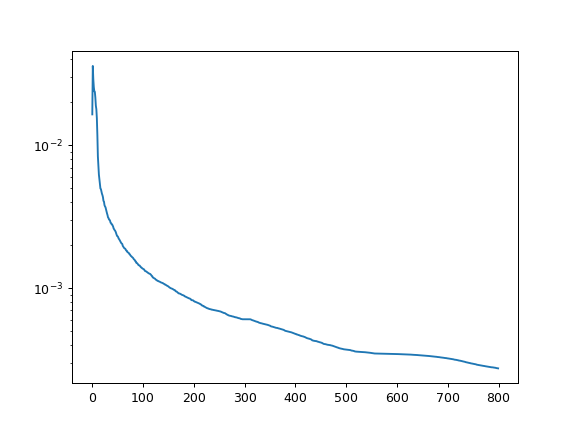

0.8421470686957719

In [406]:
plt
plt.semilogy(lsa.explained_variance_ratio_)
lsa.explained_variance_ratio_.sum()

In [380]:
pd.DataFrame(dtm_lsa, index = docs)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
are dubai abc almanar hotel apartment,0.068770,0.016870,-0.024490,0.025393,0.069426,0.018578,-0.014983,0.243123,-0.121492,-0.004379,...,-0.000843,-0.003669,-0.001029,0.000460,0.001548,-0.001405,-0.001066,0.002888,-4.606470e-03,0.000661
are dubai admiral plaza hotel,0.108387,0.025546,-0.038750,0.035246,0.108129,0.034698,-0.018172,0.321194,-0.149808,-0.002613,...,-0.000319,0.000294,-0.000618,-0.000648,0.000114,0.000442,-0.000027,0.000570,-3.601784e-04,0.000452
are dubai bustan centre residence,0.027623,0.020551,-0.019146,0.030548,0.098507,-0.023345,-0.015573,0.273995,-0.168833,-0.007635,...,-0.000455,0.000400,0.022127,-0.014096,-0.003998,0.020875,-0.028622,-0.011411,2.468897e-03,-0.017908
are dubai bustan rotana dubai,0.034955,0.019312,-0.029778,0.025169,0.093382,0.013814,-0.024579,0.496764,-0.295051,-0.009423,...,-0.000639,0.004437,0.021760,-0.015771,-0.006533,0.022595,-0.025203,-0.015382,4.502307e-03,-0.013944
are dubai hijaz heritage motel,0.022870,0.027537,-0.003295,0.026496,0.035839,0.011326,-0.012730,0.237746,-0.138577,-0.004425,...,-0.002100,0.000128,-0.000775,-0.000156,-0.004761,-0.000138,0.001350,-0.002998,1.811038e-03,0.003848
are dubai jawhara gardens hotel,0.113706,0.022298,-0.036657,0.034496,0.099156,0.019570,-0.023385,0.368973,-0.184613,-0.002245,...,0.006206,0.016087,0.012271,0.012189,-0.026853,-0.012268,0.013965,0.045671,3.285959e-02,0.025910
are dubai khaleej hotel,0.100230,0.025549,-0.035510,0.035806,0.098321,0.019689,-0.022405,0.360363,-0.178202,-0.002194,...,0.001321,0.000523,-0.000963,-0.000475,0.000435,-0.000835,0.001038,-0.002020,5.586350e-04,-0.000467
are dubai khaleej palace hotel,0.098207,0.024561,-0.029987,0.033876,0.090845,0.022819,-0.023496,0.342208,-0.131048,-0.007488,...,-0.000483,-0.000425,0.000009,0.000151,0.000325,-0.000116,0.000093,0.000183,-1.087908e-03,-0.000795
are dubai maha desert resort,0.022987,0.024563,0.009333,0.010667,0.053621,0.012007,-0.017750,0.278492,-0.160028,-0.005653,...,0.009689,-0.001631,0.006897,0.012965,0.004145,0.005419,0.005016,0.007883,6.800190e-03,0.008102
are dubai manzil hotel,0.106774,0.027173,-0.037714,0.037952,0.104220,0.020794,-0.023663,0.380547,-0.188619,-0.002200,...,0.012445,-0.005995,-0.006384,-0.002736,0.009560,0.003914,-0.003778,0.001135,-1.117332e-02,0.015651


In [381]:
pd.DataFrame(lsa.components_,columns =cv.get_feature_names())

,abba,abbey,abbott,abby,abc,abcone,abigail,abri,academy,ace,...,ywca,zagy,zayed,zetter,zhabei,zhao,zhong,zhongfu,zhongguancun,zhongshan
0,0.001151,0.005137,0.000849,0.000635,0.002058,0.002393,0.001066,0.001408,0.001934,0.003339,...,0.000930,0.000163,0.000105,0.001934,0.000170,0.000622,0.000534,0.000261,0.000660,0.000485
1,-0.000577,-0.002776,0.001695,0.001432,-0.000771,-0.001235,0.002402,0.001365,-0.001400,0.000488,...,0.000432,0.000255,0.000091,-0.001400,0.000110,0.000243,0.000366,0.000102,0.000281,0.000166
2,0.000125,0.000571,-0.000607,-0.000928,-0.000073,0.000245,-0.001555,-0.001261,0.000461,-0.001638,...,-0.000578,0.000117,-0.000156,0.000461,-0.000338,-0.000601,-0.000362,-0.000252,-0.000764,-0.000456
3,0.000047,-0.000111,0.000544,0.002660,0.000238,0.000004,0.004459,0.004205,-0.000276,-0.002314,...,0.002865,0.000230,0.000119,-0.000276,0.000782,0.001257,0.000988,0.000528,0.001521,0.000891
4,-0.000141,-0.000992,0.000143,-0.001688,0.000393,-0.000256,-0.002830,0.004373,-0.000812,0.000042,...,0.005941,0.000703,0.000516,-0.000812,0.001944,0.003054,0.002047,0.001283,0.004169,0.002177
5,-0.000028,-0.000114,-0.000546,0.000165,0.000241,-0.000019,0.000277,-0.004235,-0.000184,-0.000159,...,-0.004918,-0.000125,0.000103,-0.000184,0.003546,0.004906,0.003071,0.002062,0.006818,0.003700
6,-0.000028,0.000076,0.007549,-0.000885,-0.000096,-0.000011,-0.001483,-0.001932,0.000098,-0.000791,...,-0.001437,0.000043,-0.000042,0.000098,0.000139,0.000083,0.000214,0.000035,0.000201,0.000180
7,-0.000009,-0.000247,0.000511,0.000064,0.002918,0.000019,0.000108,-0.000990,-0.000704,-0.000216,...,-0.001354,0.003350,0.003260,-0.000704,-0.001075,-0.001044,-0.000908,-0.000439,-0.001786,-0.000809
8,0.000011,-0.000059,0.000172,0.000014,-0.001379,0.000041,0.000024,0.000195,-0.000218,0.000065,...,0.000139,-0.002247,-0.002061,-0.000218,-0.000275,-0.000163,-0.000037,-0.000068,-0.000239,-0.000144
9,0.000024,0.000208,0.000090,0.000009,0.000128,0.000050,0.000015,0.000177,-0.000043,0.000135,...,0.000146,-0.000006,0.000110,-0.000043,0.004990,0.006735,-0.003898,0.002835,-0.007814,0.006519


In [382]:
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
HotelCorr=pd.DataFrame(similarity,index=docs, columns=docs)

In [350]:
# Comparision India & Dubai
INDUCORR=HotelCorr[HotelCorr.index.str.startswith('are dubai')==False][HotelCorr.columns[HotelCorr.columns.str.startswith('are dubai')]]
INDUCORR['indexes']=INDUCORR.index
INDUCORR=pd.melt(INDUCORR,id_vars=["indexes"])
INDUCORR=INDUCORR[abs(INDUCORR["value"])>=.50]
INDUCORR=INDUCORR.reset_index()

In [354]:
INDUCORR.groupby(["variable"]).size()

variable
are dubai abc almanar hotel apartment                  1
are dubai admiral plaza hotel                          1
are dubai ambassador hotel                             2
are dubai ascot hotel                                  1
are dubai astoria hotel                                3
are dubai atlantis the palm                            1
are dubai baniyas square meridien                      1
are dubai belvedere court hotel apartments             2
are dubai chelsea hotel                                6
are dubai chelsea tower hotel apartments               1
are dubai city seasons hotel                           3
are dubai city seasons suites                          2
are dubai city star hotel                              2
are dubai city tower hotel aparments                   3
are dubai claridge hotel                               1
are dubai comfort inn hotel                           13
are dubai copthorne hotel dubai                        1
are dubai coral boutiq

In [355]:
#('M', 'C'): 44 #the syntax is: mydict[key] = "value"
dicti=""
Weights={}
for ix in range(len(INDUCORR)):
    if(INDUCORR.loc[ix]["variable"]=='are dubai dhow palace hotel'):
        dicta="('"+INDUCORR.loc[ix]["variable"]+"', '"+INDUCORR.loc[ix]["indexes"]+"'): "+str(round(INDUCORR.loc[ix]["value"],2))
        dicti=dicti+", "+dicta
        Weights[(INDUCORR.loc[ix]["variable"],INDUCORR.loc[ix]["indexes"])]=round(INDUCORR.loc[ix]["value"],2)*2
       

In [356]:
colorps=["red","red","red","red","red","blue","blue","blue","red","red"]
widthes=[1,1,1,1,0.8,0.6,1.8,1.5,1.7,1]

In [360]:
#Weights={ ('are dubai admiral plaza hotel', 'england london admiral hotel'): 0.76, ('are dubai jawhara gardens hotel', 'england london lexham gardens'): 0.76, ('are dubai jawhara gardens hotel', 'england london craven gardens hotel'): 0.78, ('are dubai jawhara gardens hotel', 'england london the montague the gardens'): 0.76, ('are dubai ambassador hotel', 'india new delhi ambassador hotel'): 0.73, ('are dubai ascot hotel', 'england london the ascot hotel'): 0.85, ('are dubai astoria hotel', 'usa san francisco astoria hotel'): 0.72, ('are dubai city star hotel', 'england london star hotel'): 0.78, ('are dubai city tower hotel aparments', 'usa new york city beekman tower hotel'): 0.76, ('are dubai city tower hotel aparments', 'usa new york city eastgate tower'): 0.73, ('are dubai claridge hotel', 'england london claridge'): 0.84, ('are dubai comfort inn hotel', 'england london comfort inn vauxhall'): 0.76, ('are dubai dolphin hotel apartments', 'england london dolphin hotel'): 0.75, ('are dubai hatta fort hotel', 'can montreal hotel fort'): 0.86, ('are dubai hatta fort hotel', 'can quebec montreal hotel fort'): 0.76, ('are dubai hotel eureka', 'can montreal hotel eureka'): 0.84, ('are dubai hotel eureka', 'can quebec montreal hotel eureka'): 0.76, ('are dubai imperial suites', 'england london imperial hotel'): 0.74, ('are dubai kirklees hotel apartment', 'china beijing hwa apartment hotel'): 0.75, ('are dubai landmark hotel', 'england london the landmark london'): 0.76, ('are dubai lords hotel', 'england london lords hotel'): 0.86, ('are dubai majestic hotel', 'england london majestic'): 0.82, ('are dubai majestic hotel', 'usa illinois chicago majestic hotel'): 0.71, ('are dubai majestic hotel', 'usa san francisco hotel majestic'): 0.73, ('are dubai marco polo hotel', 'china beijing marco polo parkside hotel'): 0.73, ('are dubai mayfair hotel', 'england london flemings mayfair hotel'): 0.82, ('are dubai mayfair hotel', 'england london the chesterfield mayfair hotel'): 0.82, ('are dubai montreal hotel', 'can montreal hotel'): 0.74, ('are dubai orchid hotel', 'india new delhi uppal orchid ecotel hotel'): 0.81, ('are dubai pacific hotel', 'china shanghai pacific hotel'): 0.74, ('are dubai pacific hotel', 'england london pacific hotel'): 0.84, ('are dubai premier inn', 'england london premier inn london beckton'): 0.72, ('are dubai queens hotel', 'england london queens hotel'): 0.83, ('are dubai queens hotel', 'england london queens park hotel'): 0.73, ('are dubai royal ascot hotel', 'england london the ascot hotel'): 0.73, ('are dubai savoy suites', 'england london the savoy'): 0.74, ('are dubai taj palace hotel', 'india new delhi taj palace hotel'): 0.79, ('are dubai the carlton tower hotel', 'england london jumeirah carlton tower'): 0.71}
G = nx.Graph()

# each edge is a tuple of the form (node1, node2, {'weight': weight})
edges = [(k[0], k[1], {'weight': v}) for k, v in Weights.items()]
G.add_edges_from(edges)


pos = nx.spring_layout(G,k=0.15,iterations=20) # positions for all nodes
# nodes
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=colorps)

# labels
nx.draw_networkx_labels(G,pos,font_size=9,font_family='sans-serif')

# edges
nx.draw_networkx_edges(G,pos,edgelist=edges, width=widthes)

# weights
labels = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

<IPython.core.display.Javascript object>


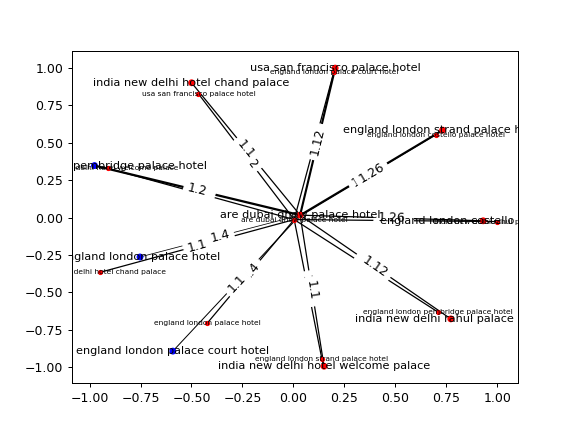

In [359]:
G = nx.Graph()
# each edge is a tuple of the form (node1, node2, {'weight': weight})
edges = [(k[0], k[1], {'weight': v}) for k, v in Weights.items()]
G.add_edges_from(edges)

pos = nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=10)

# labels
nx.draw_networkx_labels(G,pos,font_size=6,font_family='sans-serif')

# edges
nx.draw_networkx_edges(G,pos,edgelist=edges, width=1)

# weights
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [7]:
def graph_hotel(hotelname):
    dicti=""
    Weights={}
    for ix in range(len(INDUCORR)):
        if(INDUCORR.loc[ix]["variable"]==hotelname):
            dicta="('"+INDUCORR.loc[ix]["variable"]+"', '"+INDUCORR.loc[ix]["indexes"]+"'): "+str(round(INDUCORR.loc[ix]["value"],2))
            dicti=dicti+", "+dicta
            Weights[(INDUCORR.loc[ix]["variable"],INDUCORR.loc[ix]["indexes"])]=round(INDUCORR.loc[ix]["value"],2)*2

    colorps=["black","red","red","red","blue","blue","blue","green","green","black"]
    widthes=[1.12,1.12,1.12,1.28,1.1,1.4,1.28,1.28,1.14,1]
    widthes=widthes*2
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size

    G = nx.Graph()

    # each edge is a tuple of the form (node1, node2, {'weight': weight})
    edges = [(k[0], k[1], {'weight': v}) for k, v in Weights.items()]
    G.add_edges_from(edges)


    pos = nx.spring_layout(G,k=0.15,iterations=20) # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=20,node_color=colorps)

    # labels
    nx.draw_networkx_labels(G,pos,font_size=9,font_family='sans-serif')

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=edges, width=widthes)

    # weights
    labels = nx.get_edge_attributes(G,'weight')

    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [ ]:
pd.DataFrame(lsa.components_,columns =cv.get_feature_names())

In [20]:
Dataset['text'] = Dataset['Content'].apply(lambda x:preprocess(x))

In [ ]:
docs=Dataset['text'].tolist()

cv=TfidfVectorizer(max_df=0.85,stop_words=Stopwords)
tf_idf_vector=cv.fit_transform(docs)

feature_names = cv.get_feature_names()

In [50]:
#for q in range(len(HotelLevelDS)):
doc = 7
feature_index = tf_idf_vector[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [tf_idf_vector[doc, x] for x in feature_index])
print(docs[doc])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w+" "+str(s))

In [77]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(1000,algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(tf_idf_vector)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)